In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Import Dataset and Get General Overview

In [2]:
dataset = pd.read_csv('gt_2014.csv')
dataset.head(5)

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,8.8358,1022.2,98.762,3.2422,23.152,1067.5,549.94,126.16,11.381,1.9157,68.292
1,9.0529,1021.8,97.464,3.2074,23.207,1067.9,549.80,126.51,11.476,2.0596,68.610
2,9.2464,1021.3,96.494,3.2051,23.296,1068.5,549.89,126.96,11.555,2.1621,68.324
3,9.3792,1020.9,95.912,3.2159,23.465,1069.6,549.94,127.83,11.539,2.1214,67.619
4,9.5757,1020.8,95.412,3.1898,23.205,1068.1,549.83,126.56,11.484,2.1549,66.499


In [3]:
# Check for missing values
dataset.isna().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7158 entries, 0 to 7157
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      7158 non-null   float64
 1   AP      7158 non-null   float64
 2   AH      7158 non-null   float64
 3   AFDP    7158 non-null   float64
 4   GTEP    7158 non-null   float64
 5   TIT     7158 non-null   float64
 6   TAT     7158 non-null   float64
 7   TEY     7158 non-null   float64
 8   CDP     7158 non-null   float64
 9   CO      7158 non-null   float64
 10  NOX     7158 non-null   float64
dtypes: float64(11)
memory usage: 615.3 KB


array([[<Axes: title={'center': 'AT'}>, <Axes: title={'center': 'AP'}>,
        <Axes: title={'center': 'AH'}>],
       [<Axes: title={'center': 'AFDP'}>,
        <Axes: title={'center': 'GTEP'}>,
        <Axes: title={'center': 'TIT'}>],
       [<Axes: title={'center': 'TAT'}>, <Axes: title={'center': 'TEY'}>,
        <Axes: title={'center': 'CDP'}>],
       [<Axes: title={'center': 'CO'}>, <Axes: title={'center': 'NOX'}>,
        <Axes: >]], dtype=object)

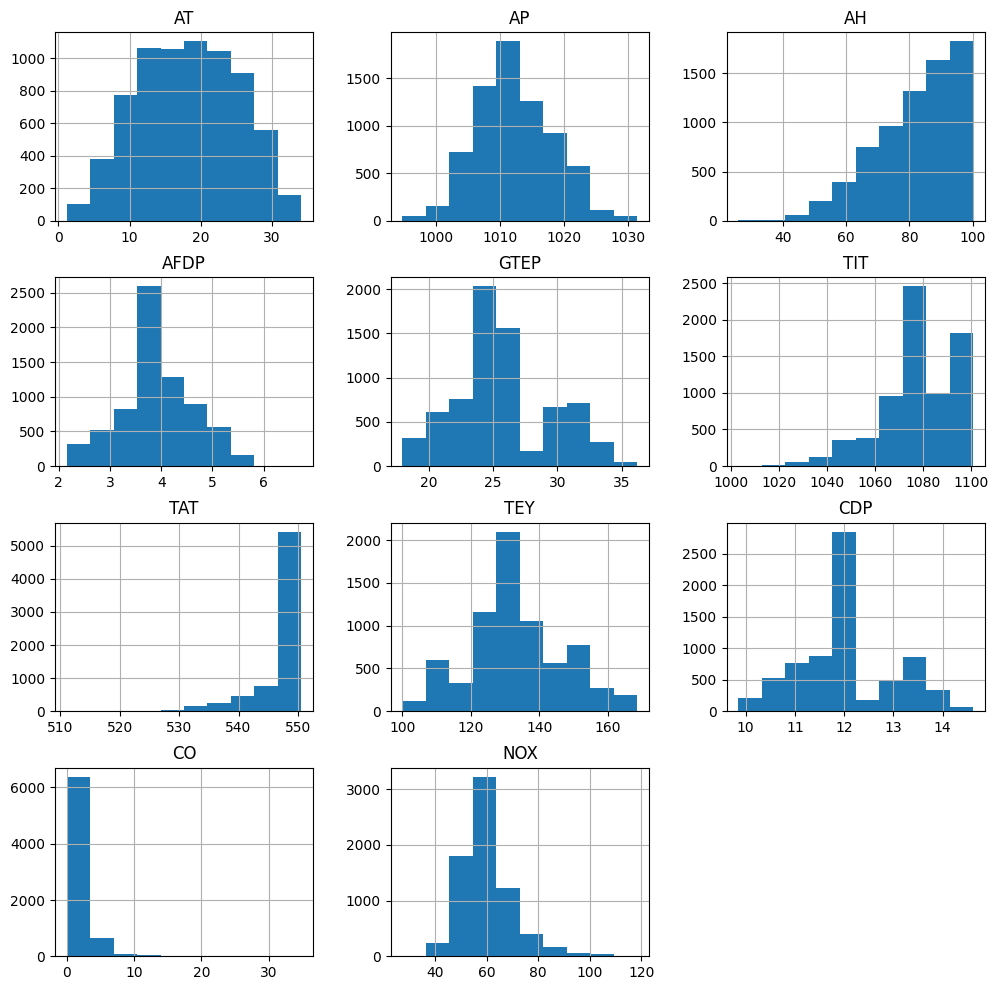

In [5]:
# Plot a histogram
dataset.hist(bins=10, figsize=(12, 12))

# Data Preprocessing

# Correlation Between Attributes

,AT,AFDP,GTEP,TIT,TEY,CDP
0,8.8358,3.2422,23.152,1067.5,126.16,11.381
1,9.0529,3.2074,23.207,1067.9,126.51,11.476
2,9.2464,3.2051,23.296,1068.5,126.96,11.555
3,9.3792,3.2159,23.465,1069.6,127.83,11.539
4,9.5757,3.1898,23.205,1068.1,126.56,11.484


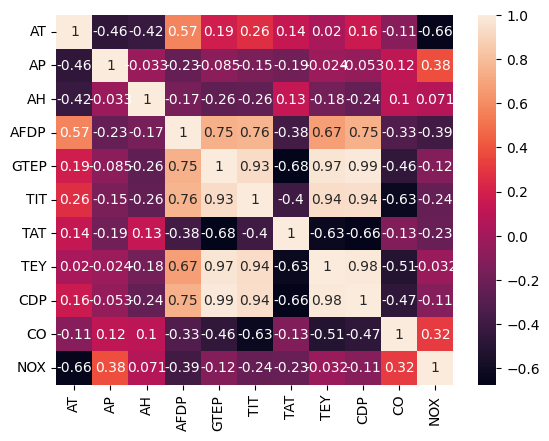

In [6]:
import seaborn as sns

corr_matrix = dataset.corr(method='pearson')
sns.heatmap(corr_matrix, annot=True)

# drop attributes with |correlation| < 0.5 towards CO and NOX and the dependent variables CO and NOX
dataset2 = dataset.drop(["AP", "AH", "TAT", "CO", "NOX"], axis=1)
dataset2.head(5)

# Scale Attributes Using StandardScaler

In [7]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
dataset3 = sc.fit_transform(dataset2)

# Applying PCA

In [8]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
dataset4 = pca.fit_transform(dataset3)

# Clustering Using K-Means

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

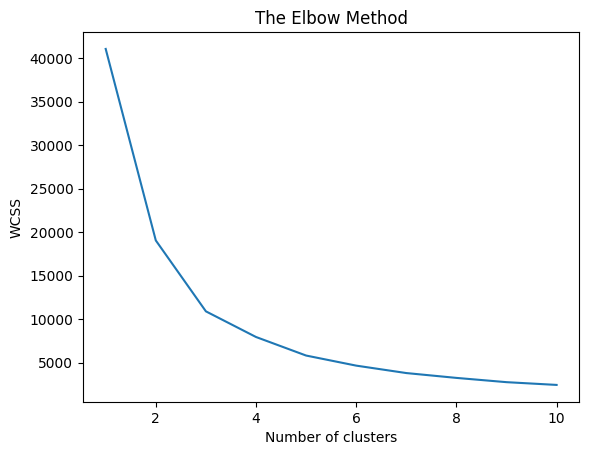

In [9]:
from sklearn.cluster import KMeans

# Using Elbow Method to find optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(dataset4)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


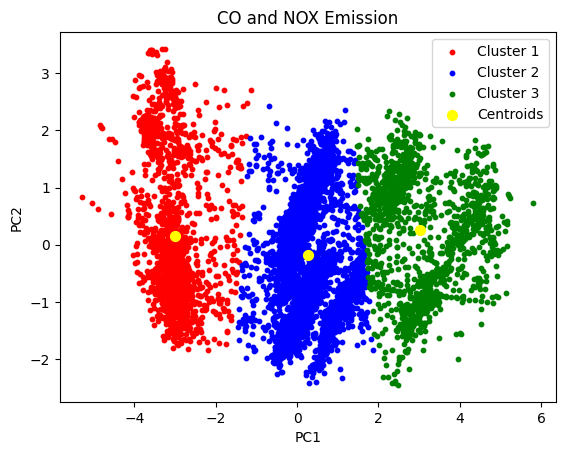

In [10]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
result = kmeans.fit_predict(dataset4)

plt.scatter(dataset4[result == 0, 0], dataset4[result == 0, 1], s = 10, c = 'red', label = 'Cluster 1')
plt.scatter(dataset4[result == 1, 0], dataset4[result == 1, 1], s = 10, c = 'blue', label = 'Cluster 2')
plt.scatter(dataset4[result == 2, 0], dataset4[result == 2, 1], s = 10, c = 'green', label = 'Cluster 3')
# plt.scatter(dataset4[result == 3, 0], dataset4[result == 3, 1], s = 10, c = 'purple', label = 'Cluster 4')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 50, c = 'yellow', label = 'Centroids')
plt.title('CO and NOX Emission')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()